In [1]:
import pandas as pd
dataset=pd.read_csv("C:/Users/HP/Desktop/Imarticus Learning/Datasets/Social_Network_Ads.csv")
df=pd.DataFrame(dataset)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [6]:
X=df.drop(["Purchased"],axis=1)
y=df.iloc[:,4]


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [9]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
#kernel='linear'--> gives less accuracy
model.fit(X_train,y_train)

GaussianNB()

In [10]:
y_pred=model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9375

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[54,  1],
       [ 4, 21]], dtype=int64)

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_proba=model.predict_proba(X_test)
y_predicted=y_proba[:,1]
print(y_predicted)

[0.15938228 0.25502619 0.20016837 0.13907805 0.17263691 0.06738309
 0.18594786 0.98786015 0.01962404 0.59560684 0.06661411 0.06037651
 0.18338943 0.38364523 0.03878243 0.72742885 0.27468468 0.03211538
 0.99855246 0.1984409  0.17703353 0.99856424 0.36235502 0.9182776
 0.04091906 0.99857412 0.15140136 0.10614757 0.2505536  0.25946797
 0.05570141 0.30719279 0.91276601 0.19608035 0.02910056 0.01184247
 0.04198406 0.16115162 0.10642805 0.74940395 0.11006931 0.31636449
 0.12458686 0.2059532  0.92128167 0.05736502 0.34485163 0.93195703
 0.04398357 0.84690329 0.99767701 0.20232569 0.19394218 0.74737392
 0.98285485 0.51858391 0.14076229 0.09608339 0.7141197  0.04136038
 0.16374381 0.94811608 0.02209084 0.51037285 0.0237646  0.97558178
 0.09380507 0.04464949 0.29195597 0.47501918 0.99117169 0.24994534
 0.03344163 0.60148499 0.11511649 0.02682965 0.54878333 0.36133639
 0.85574934 0.94537886]


In [14]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [15]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("area under the curve for first model:",roc_auc)

area under the curve for first model: 0.9827586206896551


Text(0, 0.5, 'true positive rate(Sensitivity)')

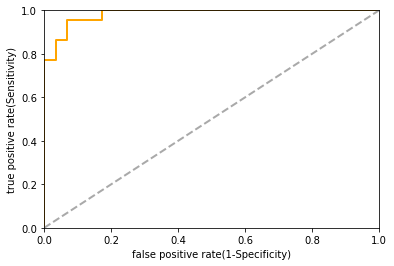

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('false positive rate(1-Specificity)')
plt.ylabel('true positive rate(Sensitivity)')